# Table of Content
* [Reading and inspecting Dataset](#reading)
* [Data Cleaning](#data_cleaning)
    * [Matches Data](#matches_data)
        * [Handling Missing Values](#handling_missing_values)
    * [Deliveries Data](#deliveries_data)
        * [Handling Missing Values](#deliveries_missing)
* [Univarite Analysis](#univariate_analysis)
    * [Matches Data](#univariate_analysis_matches_data)
    * [Deliveries Data](#univariate_deliveries)
* [ Multivariate Analysis](#bivariate_analysis)
    * [Matches Data](#bivariate_matches)
    * [Deliveries Data](#bivariate_deliveries)


<a id ='reading'></a>
# Reading and Inspecting Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
matches_df = pd.read_csv('matches1.csv')
deliveries_df = pd.read_csv('deliveries.csv')

In [3]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


The dataset contains 2 files: deliveries.csv and matches.csv.

* matches.csv contains details related to the match such as location, contesting teams, umpires, results, etc.

* deliveries.csv is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.

mathces.csv contains following features:
* **id:** a unique id to every match
* **season:** Season of ipl
* **city:** City in which has been coduced
* **date**
* **team1**
* **team2**
* **toss_winner:**
* **toss_decision:** wheater winning team select bat or field
* **result**
* **dl_aplied:** duckworth applied or not
* **winner:** winner team
* **win_by_runs** 
* **win_by_wickets**
* **player_of_match**
* **venue**
* **umpire1**
* **umpire2**
* **umpire3**


deliveries.csv contais following features:
* **match_id**
* **inning**
* **batting_team**
* **bowling_team**
* **over**
* **ball**
* **batsman**
* **non_striker**
* **bowler**
* **is_super_over**
* **wide_runs**
* **bye_runs**
* **legbye_runs**
* **noball_runs**
* **penalty_runs**
* **batsman_runs**
* **extra_runs**
* **total_runs**
* **player_dismissed**
* **dismissal_kind**
* **fielder**


In [5]:
print(f'matches dataset has {matches_df.shape[0]} rows and {matches_df.shape[1]} columns')
print(f'deliveries dataset has {deliveries_df.shape[0]} rows and {deliveries_df.shape[1]} columns')

matches dataset has 636 rows and 18 columns
deliveries dataset has 150460 rows and 21 columns


In [6]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [7]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

<a id = 'data_cleaning'></a>
# Data Cleaning

<a id ='matches_data'></a>
## Matches data


In [8]:
# check % of null values column wise
matches_df.isnull().mean()*100


id                   0.000000
season               0.000000
city                 1.100629
date                 0.000000
team1                0.000000
team2                0.000000
toss_winner          0.000000
toss_decision        0.000000
result               0.000000
dl_applied           0.000000
winner               0.471698
win_by_runs          0.000000
win_by_wickets       0.000000
player_of_match      0.471698
venue                0.000000
umpire1              0.157233
umpire2              0.157233
umpire3            100.000000
dtype: float64

In [9]:
# in 'umpire3' feature all the records are NaN,we drop this column
matches_df.drop('umpire3',axis =1,inplace =True)

In [10]:
# handling missing values in 'city' feature
matches_df[matches_df['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


* rows in which 'city' is NaN are the matches which was played in Dubai Internation Cricket Stadium.we can impute NaN values with 'Dubai'.


In [11]:
matches_df['city'].fillna('Dubai',inplace = True)
matches_df.city.isnull().sum()

0

In [12]:
# handling missing values in 'player_of match' feature
matches_df[matches_df['player_of_match'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


* records in which 'player_of_match' is NaN are the matches with 'No result'.we leave these records as it is.

In [13]:
# handling missing values in 'winner'
matches_df[matches_df['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


* records in which 'winner' is NaN are the matches with 'No result'.we leave these records as it is.

In [14]:
# handling missing values in 'umpire1' and 'umpire2' featue
matches_df[matches_df['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [17]:
# we can impute NaN in 'umpire1' and 'umpire2' with umpire with most matches
matches_df[['umpire1','umpire2']].fillna(matches_df['umpire1'].mode()[0],inplace = True)

In [18]:
matches_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [19]:
matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


<a id = 'deliveries_data'></a>
## Deliveries data

In [20]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


<a id ='deliveries_missing'></a>
### Handling Missing Values

In [21]:
# Checking % of missing values columns wise
deliveries_df.isnull().mean()*100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.056493
dismissal_kind      95.056493
fielder             96.431610
dtype: float64

In [22]:
# handling missing values in 'player_dismissed' and 'dimissal_kind' feature
deliveries_df[deliveries_df[['player_dismissed','dismissal_kind']].isnull().any(axis = 1)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150454,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,1,CJ Jordan,Sachin Baby,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


* records in which 'player_dismissed' and 'dimissal_kind' is NaN are the records in which player is  not dissmissed.we are leaving these records as it is.

In [23]:
deliveries_df[['player_dismissed','dismissal_kind']].isnull()

,player_dismissed,dismissal_kind
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
150455,True,True
150456,False,False
150457,True,True
150458,True,True


<a id ='univariate_analysis'></a>
# Univaritate Analysis

<a id ='univariate_analysis_matches_data'></a>
## Matches data

In [24]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [25]:
# Analysing 'city' feature
matches_df['city'].value_counts(normalize=True)

Mumbai            0.133648
Bangalore         0.103774
Kolkata           0.095912
Delhi             0.094340
Hyderabad         0.077044
Chennai           0.075472
Chandigarh        0.072327
Jaipur            0.051887
Pune              0.050314
Durban            0.023585
Ahmedabad         0.018868
Centurion         0.018868
Visakhapatnam     0.017296
Rajkot            0.015723
Dharamsala        0.014151
Johannesburg      0.012579
Cape Town         0.011006
Abu Dhabi         0.011006
Ranchi            0.011006
Port Elizabeth    0.011006
Cuttack           0.011006
Dubai             0.011006
Raipur            0.009434
Sharjah           0.009434
Kochi             0.007862
Indore            0.007862
Kanpur            0.006289
Nagpur            0.004717
Kimberley         0.004717
East London       0.004717
Bloemfontein      0.003145
Name: city, dtype: float64

<AxesSubplot: >

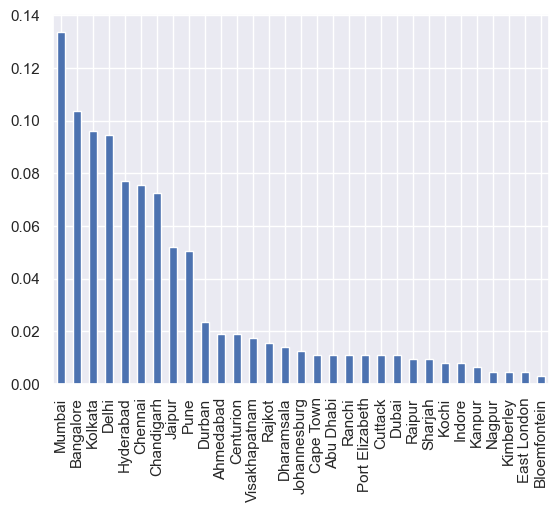

In [26]:
matches_df['city'].value_counts(normalize=True).plot.bar()

**Inference:** 
* 'Mumbai' is the city in which highest number of IPL matches has  occured ,approx(13%),followed by 'Banglore(11%)' and 'Kolkata(9%)'

In [27]:
match_played = pd.concat([matches_df['team1'],matches_df['team2']])
match_played

0              Sunrisers Hyderabad
1                   Mumbai Indians
2                    Gujarat Lions
3           Rising Pune Supergiant
4      Royal Challengers Bangalore
                  ...             
631    Royal Challengers Bangalore
632    Royal Challengers Bangalore
633          Kolkata Knight Riders
634            Sunrisers Hyderabad
635    Royal Challengers Bangalore
Length: 1272, dtype: object

In [28]:
match_played.value_counts()

Mumbai Indians                 157
Royal Challengers Bangalore    152
Kolkata Knight Riders          148
Kings XI Punjab                148
Delhi Daredevils               147
Chennai Super Kings            131
Rajasthan Royals               118
Sunrisers Hyderabad             76
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

<AxesSubplot: >

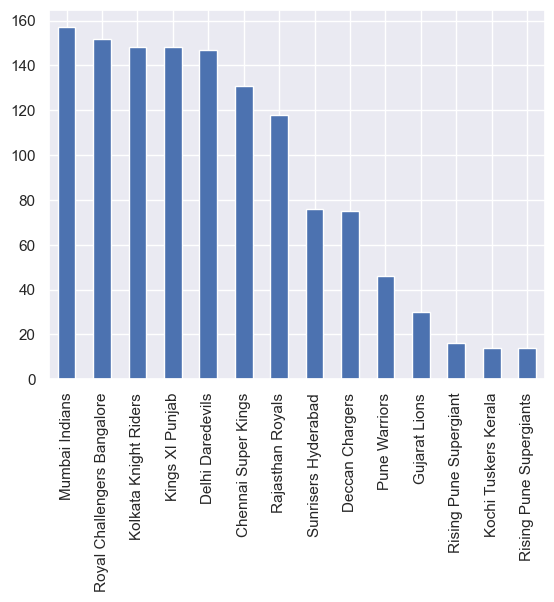

In [29]:
match_played.value_counts().plot.bar()

**Inference**:
* 'Mumbai Indians' has played highest number of matches approx(157),followed by 'Royal challangers Banlore(152)' and 'Kolkata Knight Riders(148)'

<AxesSubplot: >

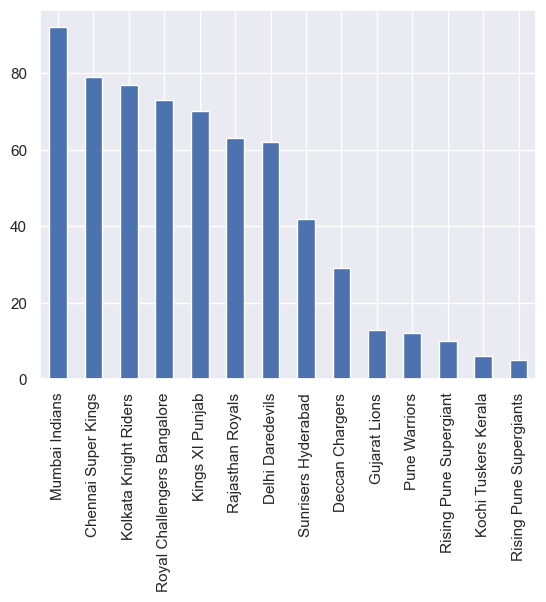

In [30]:
# Analysing winner feature
matches_df['winner'].value_counts().plot.bar()

**Inference:**
* highest number of matches won by 'Mumbai Indians' followed 'Chennai Super Kings' and 'Kolkata Knight Riders'

<AxesSubplot: >

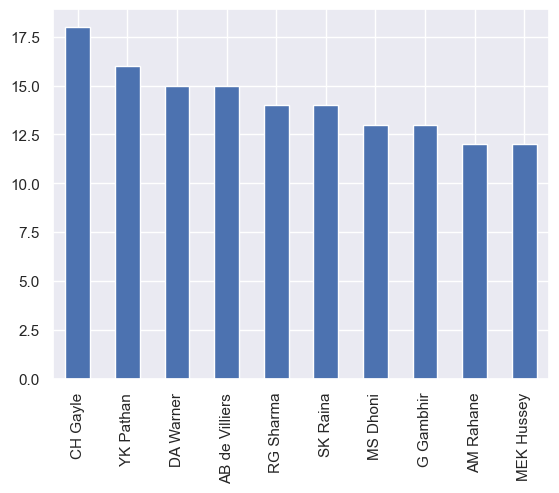

In [31]:
# Analysing player_of_match
matches_df['player_of_match'].value_counts()[:10].plot.bar()

**Inference:**
* 'CH Gayle' has won player of the match most number of times,followed by 'YK Pathan' and 'DA Warner'

In [32]:
## Analysing toss_decision
val = matches_df['toss_decision'].value_counts(normalize=True).values
val

array([0.57075472, 0.42924528])

<AxesSubplot: >

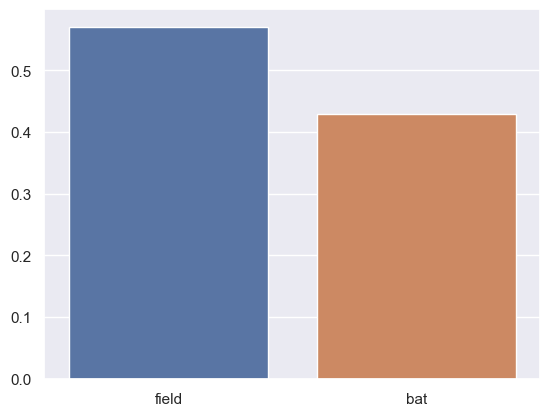

In [33]:
sns.barplot(x=['field','bat'],y=val)

**Inference:**
* in 57% matches,toss winner has elected field.

In [35]:
## analysing 'umpire' data
umpires = pd.concat([matches_df['umpire1'],matches_df['umpire2']])
umpires.value_counts()[:5]
                    

HDPK Dharmasena    87
S Ravi             85
AK Chaudhary       58
C Shamshuddin      56
SJA Taufel         55
dtype: int64

**Inference:**
* Top 3 umpires based on count of matches they have done umpiring
    * HDPK Dharmasena    87
    * S Ravi             85
    * AK Chaudhary       58

In [ ]:
matches_df.head()

In [36]:
# Analysing 'result' feature
matches_df.result.unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [37]:
matches_df.result.value_counts(normalize=True)



normal       0.984277
tie          0.011006
no result    0.004717
Name: result, dtype: float64

**Inference:**
* only 1% matches are tie, and 0.4% has ended with no result.

<AxesSubplot: xlabel='win_by_runs', ylabel='Density'>

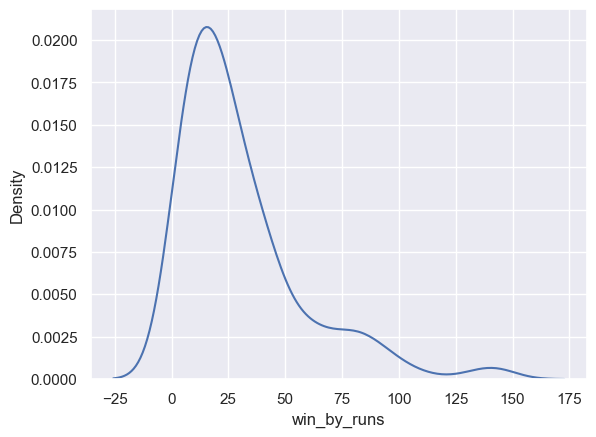

In [38]:
# Analysing "win_by_runs"
runs = matches_df['win_by_runs'].replace(0,np.nan)

sns.kdeplot(runs)

<AxesSubplot: xlabel='win_by_wickets', ylabel='Density'>

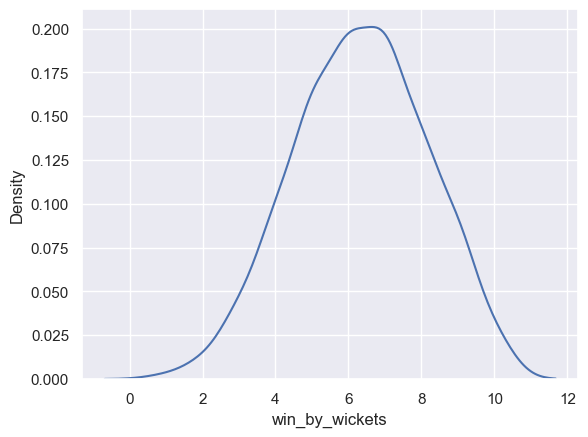

In [39]:
# Analysing "win_by_wickets"
runs = matches_df['win_by_wickets'].replace(0,np.nan)

sns.kdeplot(runs)

In [40]:
matches_df['win_by_wickets'].value_counts()

0     297
7      70
6      68
5      57
8      48
4      34
9      32
3      15
10     10
2       4
1       1
Name: win_by_wickets, dtype: int64

***Inference:**
* Most of time,winner team has won match by  10-30 runs or by 5-8 wickets.

In [ ]:
matches_df.head()

<a id ='univariate_deliveries'></a>
## Deliveries Data

In [41]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [42]:
# Analysing player_dismissed
deliveries_df['player_dismissed'].value_counts()

SK Raina          134
G Gambhir         131
RG Sharma         129
RV Uthappa        128
V Kohli           118
                 ... 
V Pratap Singh      1
DR Martyn           1
AA Noffke           1
S Ladda             1
Younis Khan         1
Name: player_dismissed, Length: 436, dtype: int64

<AxesSubplot: >

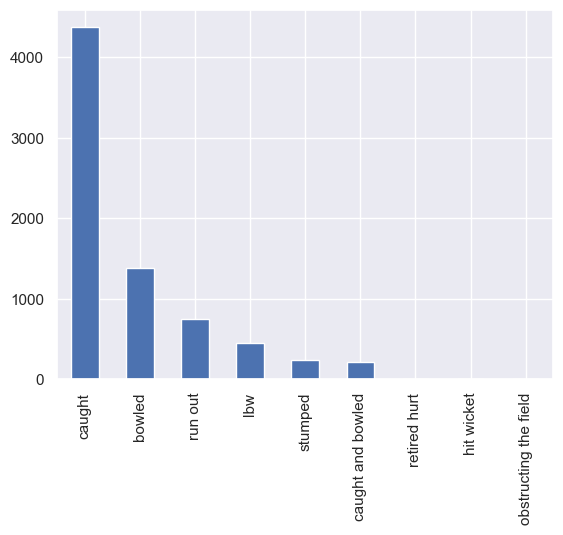

In [43]:
# Analysing 'dismissal_kind'
deliveries_df['dismissal_kind'].value_counts().plot.bar()

**Inference:**
* Most frequent dismissal_kind is 'caught', followed by 'bowled' and 'run-out'
* Highest number of times dismissed players are:
    * SK raina(134)
    * G Gambir(131)
    * RG Sharma(129)

<AxesSubplot: xlabel='total_runs', ylabel='Count'>

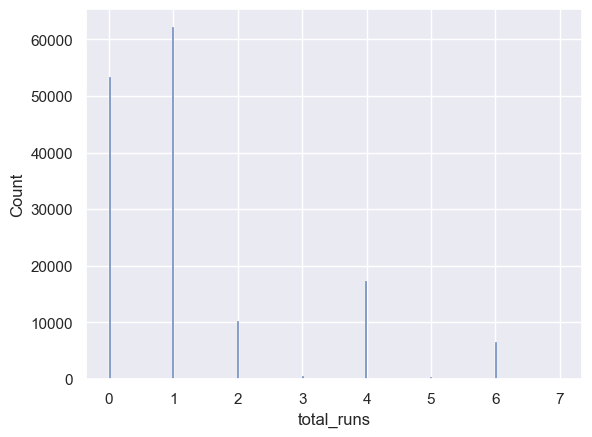

In [44]:
# Analysing 'total_runs'
sns.histplot(deliveries_df['total_runs'])

<AxesSubplot: >

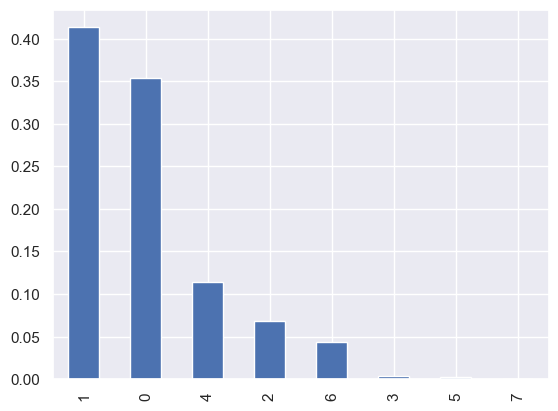

In [45]:
deliveries_df['total_runs'].value_counts(normalize=True).plot.bar()

**Inference**:
* approx 35% balls resulted in 0 runs.
* approx 41% balls resulted 1 run.
* approx 12% balls resulted in   4 runs.
* approx 7% balls resulted in 2 runs.
* approx 4% balls resulted in 6 runs.
* approx 1% balls resulted in 3 runs.

In [46]:
# Analysing fielder 'feature'
deliveries_df['fielder'].value_counts()[:5]

KD Karthik        127
MS Dhoni          126
RV Uthappa        115
AB de Villiers    101
SK Raina           96
Name: fielder, dtype: int64

**Inference:**
* Top 5 fielders are:
    * KD Karthik        127
    * MS Dhoni          126
    * RV Uthappa        115
    * AB de Villiers    101
    * SK Raina           96

<a id ='bivariate_analysis'></a>
# Mulivariate Analysis

<a id='bivariate_matches'></a>
## Matches data

In [ ]:
matches_df.head()

In [47]:
# analysing 'toss_winner' and 'winner'
temp = matches_df.copy()
temp['is_toss_winner'] = np.where(temp['toss_winner']==temp['winner'],1,0)
temp.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,is_toss_winner
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,1
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,1


<AxesSubplot: >

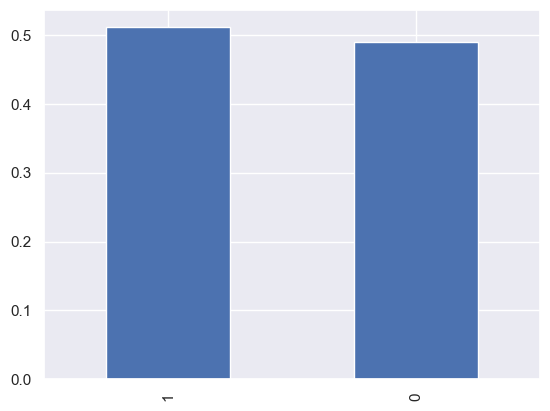

In [48]:
temp['is_toss_winner'].value_counts(normalize=True).plot.bar()

**Inference**:
* There is no relation between toss winner and match winner.

<AxesSubplot: xlabel='is_toss_winner', ylabel='toss_winner'>

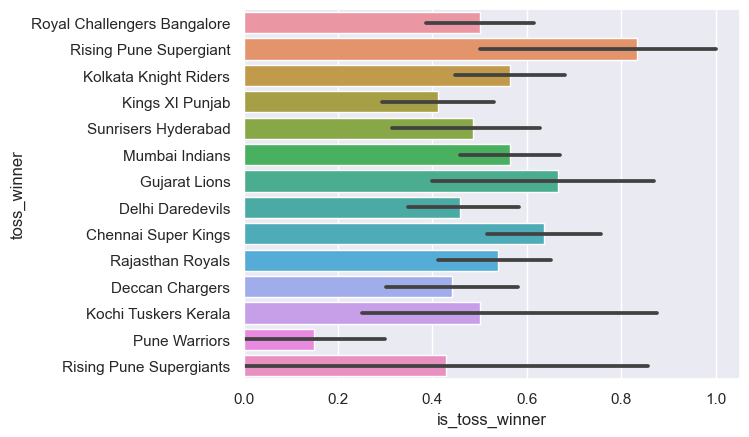

In [49]:
sns.barplot(temp,y='toss_winner',x='is_toss_winner')

**Inference**
* 'Rising Pune Super Giants' won approx 82% matches when they won the toss.
* 'Pune Warriors' won only approx 15% matches when they won the toss.

<AxesSubplot: xlabel='is_toss_winner', ylabel='toss_decision'>

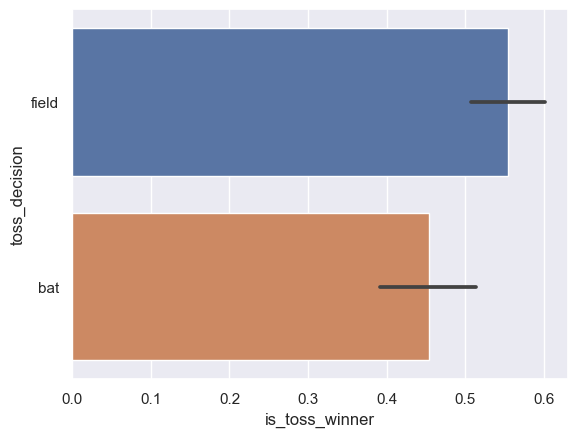

In [50]:
# Analysing 'toss_decision' and 'winner'
sns.barplot(temp,y='toss_decision',x='is_toss_winner')

**Inference:**
* approx 55% times winner team has elected field.

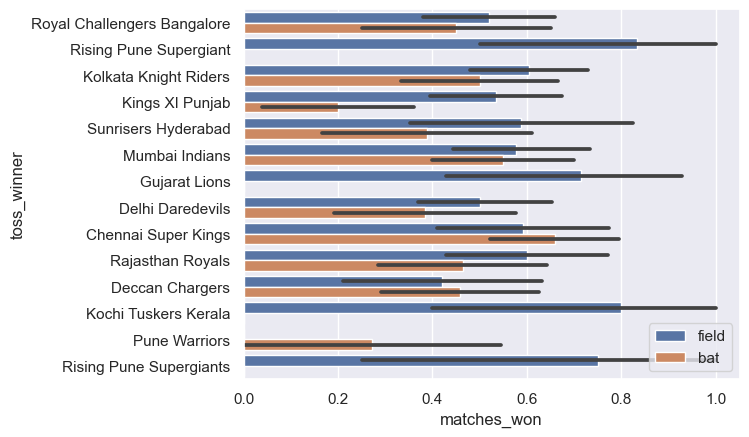

In [51]:
sns.barplot(temp,y='toss_winner',x='is_toss_winner',hue = 'toss_decision')
plt.xlabel('matches_won')
plt.legend()

### teams preformance vs season

In [52]:

df1 = matches_df[['season','team1','winner',]]
df1.rename({'team1':'team'},axis=1,inplace=True)
df2 = matches_df[['season','team2','winner']]
df2.rename({'team2':'team'},axis=1,inplace=True)
                 
teams = pd.concat([df1,df2],axis=0)
teams['has_won'] = np.where(teams['team'] == teams['winner'],1,0)
teams
                   

,season,team,winner,has_won
0,2017,Sunrisers Hyderabad,Sunrisers Hyderabad,1
1,2017,Mumbai Indians,Rising Pune Supergiant,0
2,2017,Gujarat Lions,Kolkata Knight Riders,0
3,2017,Rising Pune Supergiant,Kings XI Punjab,0
4,2017,Royal Challengers Bangalore,Royal Challengers Bangalore,1
...,...,...,...,...
631,2016,Royal Challengers Bangalore,Royal Challengers Bangalore,1
632,2016,Royal Challengers Bangalore,Royal Challengers Bangalore,1
633,2016,Kolkata Knight Riders,Sunrisers Hyderabad,0
634,2016,Sunrisers Hyderabad,Sunrisers Hyderabad,1


In [53]:
teams_season = teams.groupby(['season','team'])[['has_won']].mean().unstack(level=1)
teams_season

has_won                                                 \
team   Chennai Super Kings Deccan Chargers Delhi Daredevils Gujarat Lions   
season                                                                      
2008              0.562500        0.142857         0.500000           NaN   
2009              0.571429        0.562500         0.666667           NaN   
2010              0.562500        0.500000         0.500000           NaN   
2011              0.687500        0.428571         0.285714           NaN   
2012              0.555556        0.266667         0.611111           NaN   
2013              0.666667             NaN         0.187500           NaN   
2014              0.625000             NaN         0.142857           NaN   
2015              0.588235             NaN         0.357143           NaN   
2016                   NaN             NaN         0.500000      0.562500   
2017                   NaN             NaN         0.428571      0.285714   

                                                                   \
team   Kings XI Punjab Kochi Tuskers Kerala Kolkata Knight Riders   
season                                                              
2008          0.666667                  NaN              0.461538   
2009          0.500000                  NaN              0.230769   
2010          0.285714                  NaN              0.500000   
2011          0.500000             0.428571              0.533333   
2012          0.500000                  NaN              0.705882   
2013          0.500000                  NaN              0.375000   
2014          0.705882                  NaN              0.687500   
2015          0.214286                  NaN              0.538462   
2016          0.285714                  NaN              0.533333   
2017          0.500000                  NaN              0.562500   

                                                                             \
team   Mumbai Indians Pune Warriors Rajasthan Royals Rising Pune Supergiant   
season                                                                        
2008         0.500000           NaN         0.812500                    NaN   
2009         0.384615           NaN         0.461538                    NaN   
2010         0.687500           NaN         0.428571                    NaN   
2011         0.625000      0.285714         0.461538                    NaN   
2012         0.588235      0.250000         0.437500                    NaN   
2013         0.684211      0.250000         0.611111                    NaN   
2014         0.466667           NaN         0.500000                    NaN   
2015         0.625000           NaN         0.500000                    NaN   
2016         0.500000           NaN              NaN                    NaN   
2017         0.705882           NaN              NaN                  0.625   

                                                                                
team   Rising Pune Supergiants Royal Challengers Bangalore Sunrisers Hyderabad  
season                                                                          
2008                       NaN                    0.285714                 NaN  
2009                       NaN                    0.562500                 NaN  
2010                       NaN                    0.500000                 NaN  
2011                       NaN                    0.625000                 NaN  
2012                       NaN                    0.533333                 NaN  
2013                       NaN                    0.562500            0.588235  
2014                       NaN                    0.357143            0.428571  
2015                       NaN                    0.500000            0.500000  
2016                  0.357143                    0.562500            0.647059  
2017                       NaN                    0.230769            0.571429

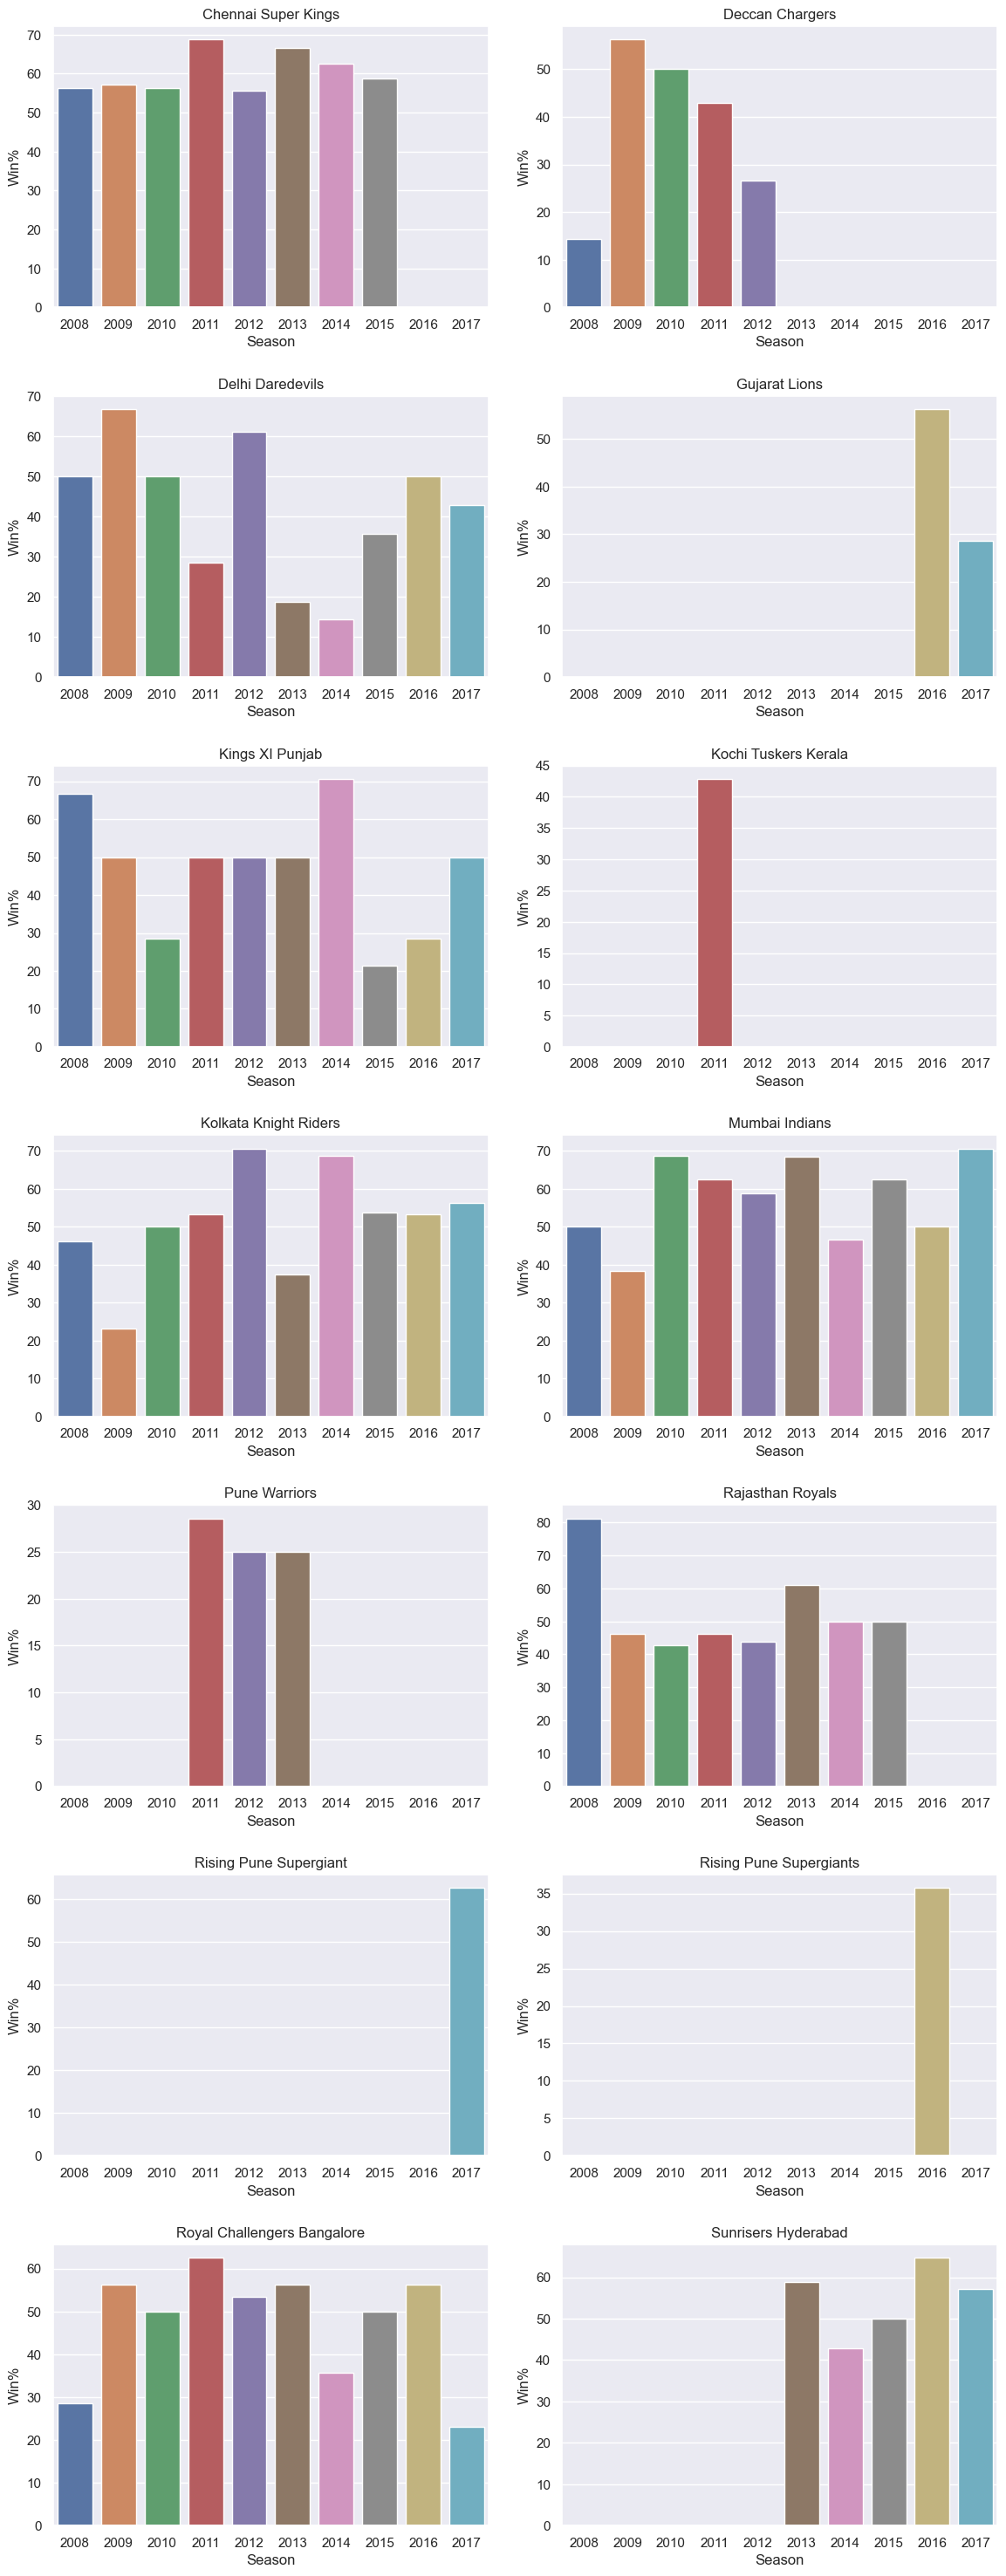

In [54]:
ind = 1
fig = plt.figure(figsize=(12,30))

for col in teams_season.columns:
    team_name = col[1]
    seasons =  teams_season[col].index
    won_perc = teams_season[col].values*100
    fig.tight_layout(pad=2.0)
    ax = plt.subplot(7,2,ind)
    sns.barplot(x=seasons,y=won_perc,ax=ax)
    ax.set_title(team_name)
    ax.set_ylabel('Win%')
    ax.set_xlabel('Season')
    ind = ind+1
    
   

**Inference**:
* Chennai Super Kings
    * Chennai Super Kings is most consistent team,won more than 55% matches in every season.
    * in 2011 Chennai Super Kings won approx 70% matches,probably the best season.
* Rajasthan Royals
    * Best Season 2008,won approx 80% in entire season.
    * after 2008 season,Rajasthan royal never won more than 50% matches,except 2013 season(65%)
    
* Delhi Daredevils
    * 2014 was the worst season for Delhi Daredevils,won only 15% matches in entire season.
* Mumbai Indians
    * Best seasons 2010,2013,2017,won approx 70% matches.
* Kolkat Knight Riders
    * Best seasons 2012,2014,won approx 70% matches in each of these season
    * worst season 2009,won less than 25% in entire season.
* Deccan Chargers
    * best season 2019
    * worst season 2008
* Kings XI Punjab
    * best seasons 2014,2008
    * worst season 2015,2016
* Royal Challengers Banglore
    * Best season 2011,won approx 62% matches
    * worst season 2017


In [ ]:
matches_df.head()

In [ ]:
teams.head()

### Face-offs

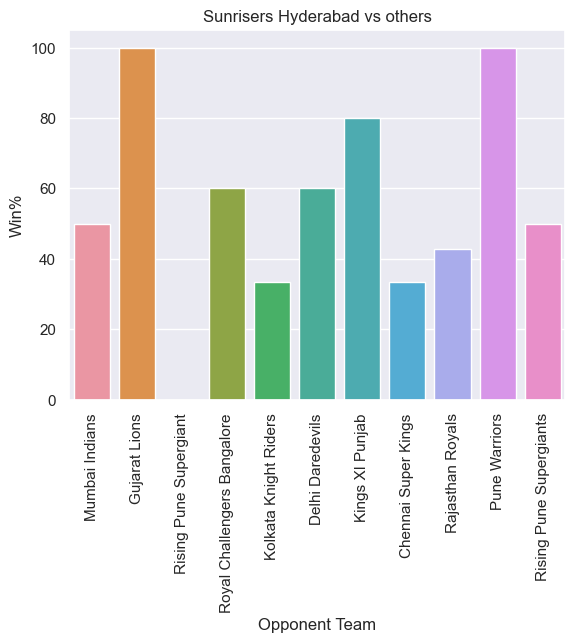

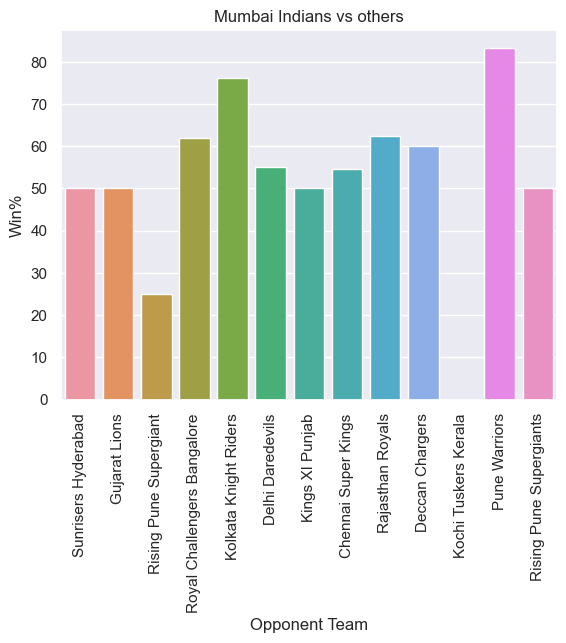

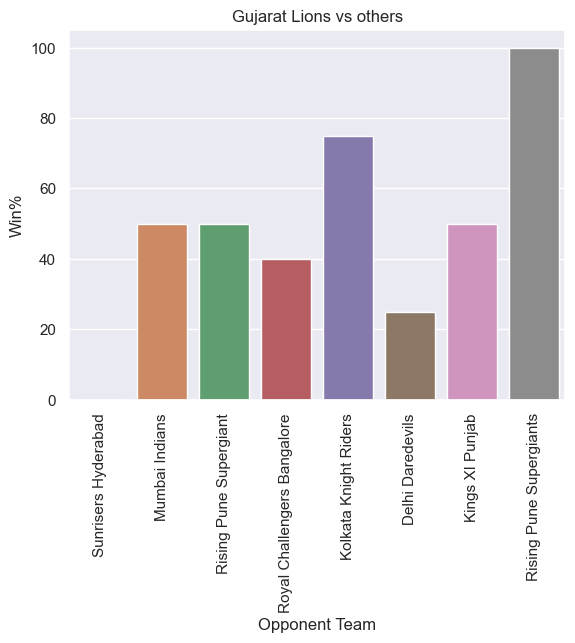

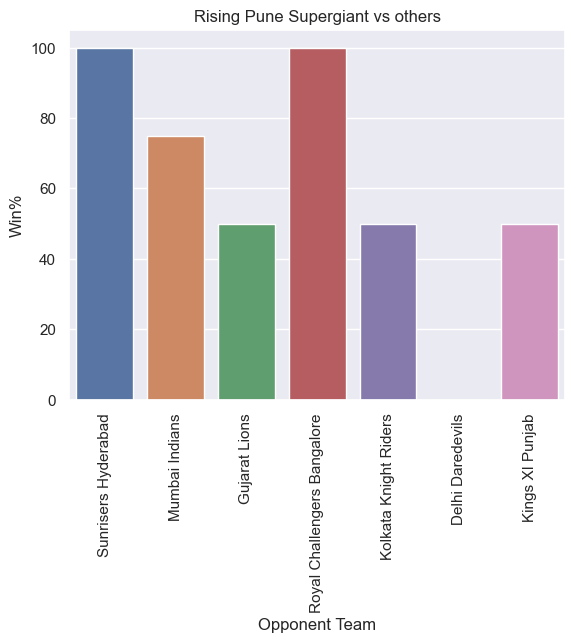

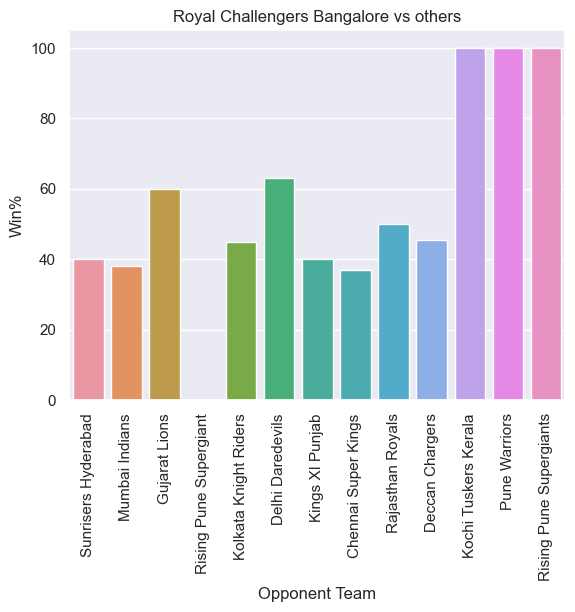

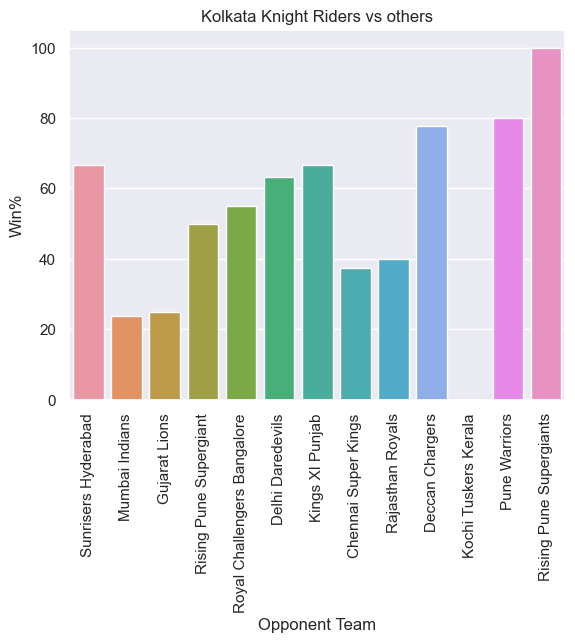

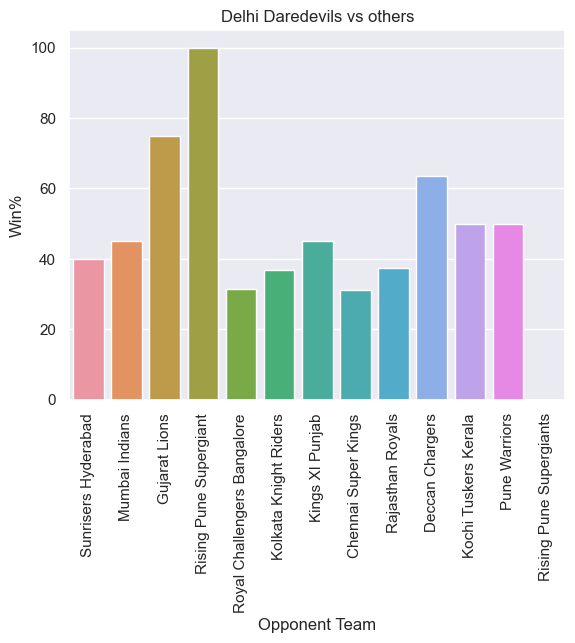

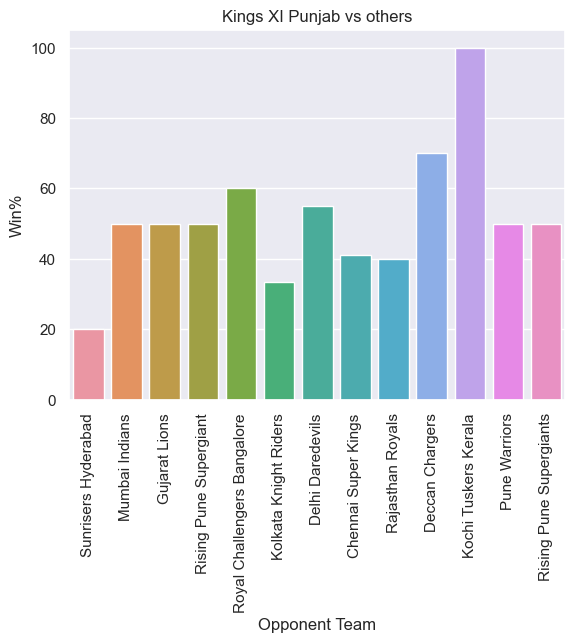

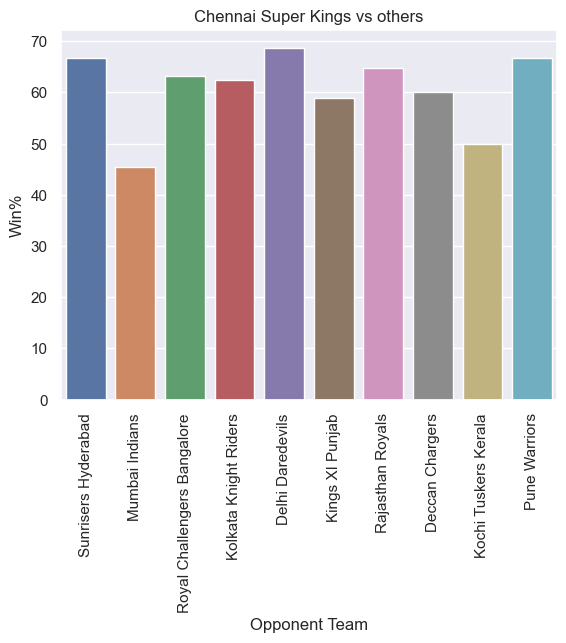

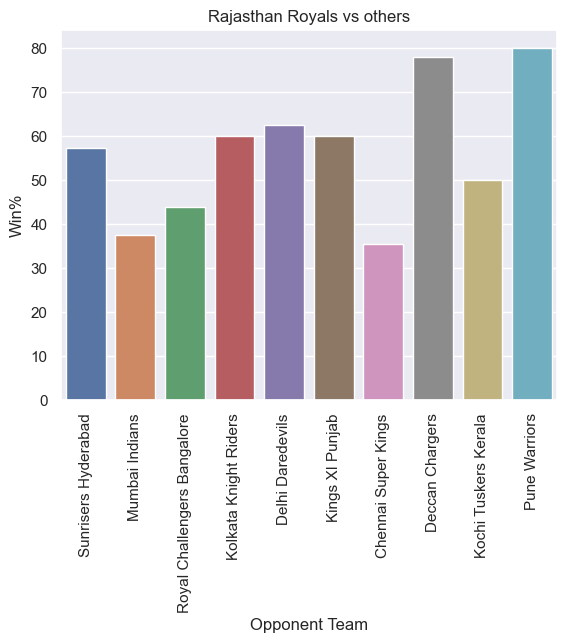

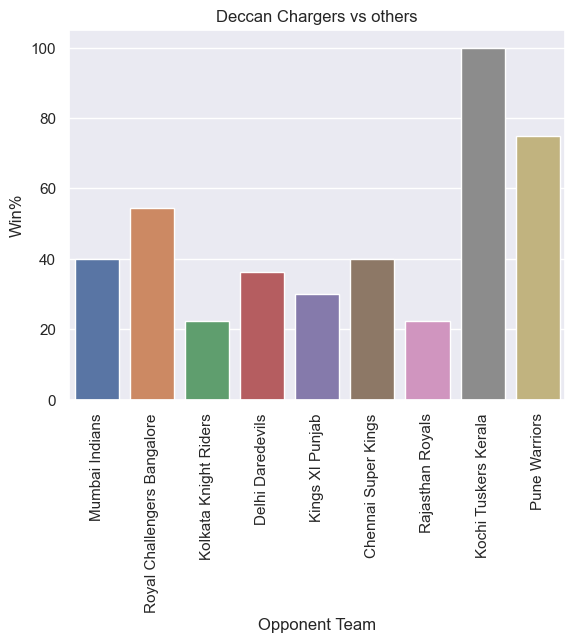

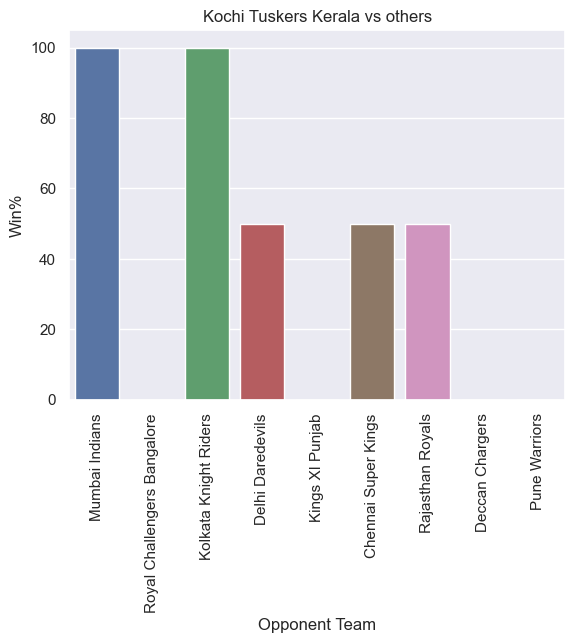

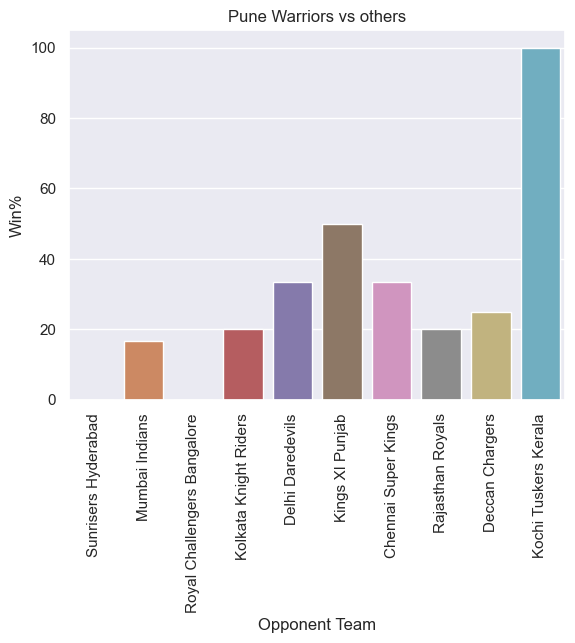

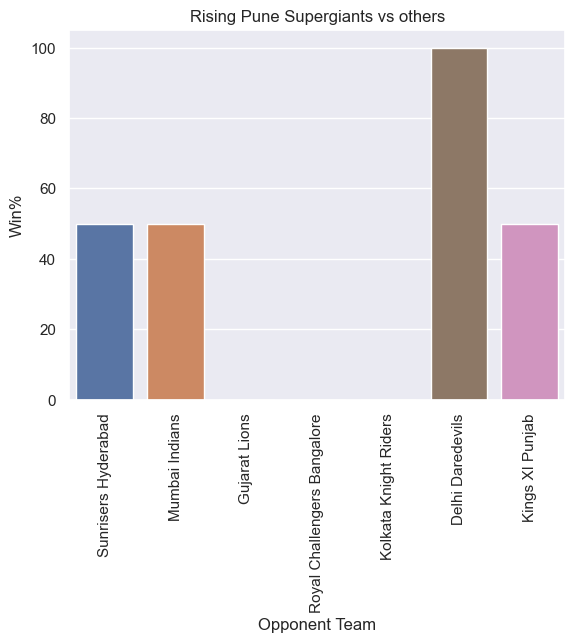

In [55]:
plt.figure()
all_teams = teams['team'].unique().tolist()
for team1 in range(len(all_teams)):
    y = []
    x = []
    for team2 in range(len(all_teams)):
        if(team1 != team2):
            
        
            team_stat = matches_df[((matches_df['team1']==all_teams[team1]) & (matches_df['team2'] ==all_teams[team2])) | ((matches_df['team2']==all_teams[team1]) & (matches_df['team1'] ==all_teams[team2]))]
            
            if(len(team_stat)!=0):
                x.append(all_teams[team2])
                team_stat['has_won'] = np.where(team_stat['winner'] == all_teams[team1],1,0)
                y.append(team_stat.has_won.mean()*100)
    sns.barplot(x=x,y=y)
    plt.title(all_teams[team1] + ' vs ' +'others' )
    plt.xlabel('Opponent Team')
    plt.xticks(rotation=90)
    plt.ylabel('Win%')
    plt.show()
        
    

**Inference**:
* Sunrisers Hyderabad:
    * Sunrisers Hyderabad's  performed outstanding against Gujarat Lions,Rising Pune Supergiants and King XI Punajab,where they boast a remarkable win% of greater than 80%.
    * Sunrisers Hyderabad won only approx 30% of matches against Chennai Super Kings and Kolkata Knight Riders.they are strongest rivals for Sunriser Hyderabad.
* Mumbai Indians:
    * Mumbai Indians is strongly consistent against all teams with the winning % of approx above 50%  against all teams.
    * Mumbai Indian outperformed Kolkata Knight Rider and Pune Warriors by winning above 75% of the matches out of all the matches against them.
* Royal Challengers Banglore:
    * Royal Challengers Banglore performed great against Rising Pune SuperGiants,Pune Warrior and Delhi Daredevils,won above 60% matches.
    * win% is quite low(<40%) against Chennai Super Kings and Mumbai Indians.they are the strongest rival for Royal Challengers Banglore.
* Chennai Super Kings:
    * Outperformed all the teams  by winnig above (60%) of matches againt every team except Mumbai Indians.
    * win% of CSK is comparatively low againt Mumbai Indians.Mumbai Indian is strongest Rival for CSk.
* Rajasthan Royals:
    * Performed great against Pune warriors and Deccan Chargers, won above 75% of the matches against each of them.
    * %  of won matches againgt CSK and Mumbai Indian is quite low(<40%).
* Kolkata Knight Riders
    * Kolkata Knight Riders has emerged as the dominant team, winning above 65% of the matches against Rising Pune SuperGiants and Sunriser Hyderabad.
    * Kolkata Knigth Riders has won only 25% of the matches against Mumbai Indians. 
* Kings XI Punjab
    * Defated Royal Challengers Banglore in 60% of the matches.
    * Performance against Sunriser Hyderabad is very low,won only 25% mathces against them.


* **Top Rivaliries:**
* Mumbai Indians Vs Sunrisers Hyderabad.
* Mumbai Indians Vs Chennai Super Kings.
* Mumbai Indians vs Kings XI Punjab.
* Royal Challengers Banglore vs Rajasthan Royals.
* Royal Challengers Banglore vs Kolkata Knigth Riders.
* Kings XI Punjab vs Delhi Daredevils.

In [ ]:
matches_df.head()

In [ ]:
teams

In [56]:
df1 = matches_df[['season','team1','winner','venue']]
df1.rename({'team1':'team'},axis=1,inplace=True)
df2 = matches_df[['season','team2','winner','venue']]
df2.rename({'team2':'team'},axis=1,inplace=True)
                 
teams = pd.concat([df1,df2],axis=0)
teams['has_won'] = np.where(teams['team'] == teams['winner'],1,0)
teams


,season,team,winner,venue,has_won
0,2017,Sunrisers Hyderabad,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1
1,2017,Mumbai Indians,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,0
2,2017,Gujarat Lions,Kolkata Knight Riders,Saurashtra Cricket Association Stadium,0
3,2017,Rising Pune Supergiant,Kings XI Punjab,Holkar Cricket Stadium,0
4,2017,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,1
...,...,...,...,...,...
631,2016,Royal Challengers Bangalore,Royal Challengers Bangalore,Shaheed Veer Narayan Singh International Stadium,1
632,2016,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,1
633,2016,Kolkata Knight Riders,Sunrisers Hyderabad,Feroz Shah Kotla,0
634,2016,Sunrisers Hyderabad,Sunrisers Hyderabad,Feroz Shah Kotla,1


In [57]:
teams_venue = pd.pivot_table(teams,index ='venue',columns='team',values = 'has_won',aggfunc='mean')

In [58]:
teams_venue = teams_venue.reset_index()
teams_venue.head()

team,venue,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
0,Barabati Stadium,0.00,0.750000,0.0,NaN,0.333333,NaN,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,Brabourne Stadium,0.50,0.000000,0.0,NaN,0.000000,NaN,0.0,0.750000,NaN,0.5,NaN,NaN,1.0,1.0
2,Buffalo Park,1.00,0.000000,1.0,NaN,NaN,NaN,0.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN
3,De Beers Diamond Oval,1.00,0.500000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,Dr DY Patil Sports Academy,0.75,0.333333,0.5,NaN,0.000000,0.0,1.0,0.714286,0.285714,0.5,NaN,NaN,0.5,NaN


In [59]:
print(teams_venue.venue.unique())

['Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Green Park' 'Himachal Pradesh Cricket Association Stadium'
 'Holkar Cricket Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New Wanderers Stadium' 'Newlands' 'OUTsurance Oval'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Punjab Cricket Association Stadium, Mohali'
 'Rajiv Gandhi International Stadium, Uppal'
 'Sardar Patel Stadium, Motera' 'Saurashtra Cricket Association Stadium'
 'Sawai Mansingh Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'Sharjah Cricket Stadium' 'Sheikh Zayed Stadium' "St George's Park"
 'Subrata Roy Sahara Stadium' 'SuperSport Park'
 'Vidarbha Cricket Association Stadium, 

In [60]:
for team in teams_venue.columns[1:]:
    fig = plt.figure(figsize=(12,10))
    temp = teams_venue[['venue',team]]
    temp.dropna(inplace=True)
    plt.barplot(temp,x=temp['venue'],y=temp[team])
   
    plt.title(team + ' in all venues')
    plt.ylabel('Win%')
    plt.xlabel('Venue')
    plt.xticks(rotation=90)
    plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

<Figure size 1200x1000 with 0 Axes>

<a id = 'bivariate_deliveries'></a>
## Deliveries Data

In [ ]:
deliveries_df.head()

In [61]:
# Analysing Batsman and runs

deliveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)

batsman
SK Raina        4548
V Kohli         4423
RG Sharma       4207
G Gambhir       4132
DA Warner       4014
                ... 
Abdur Razzak       0
S Kaushik          0
S Ladda            0
U Kaul             0
RR Bhatkal         0
Name: batsman_runs, Length: 461, dtype: int64

Text(0.5, 1.0, 'Top 5 Run Scorer in IPL')

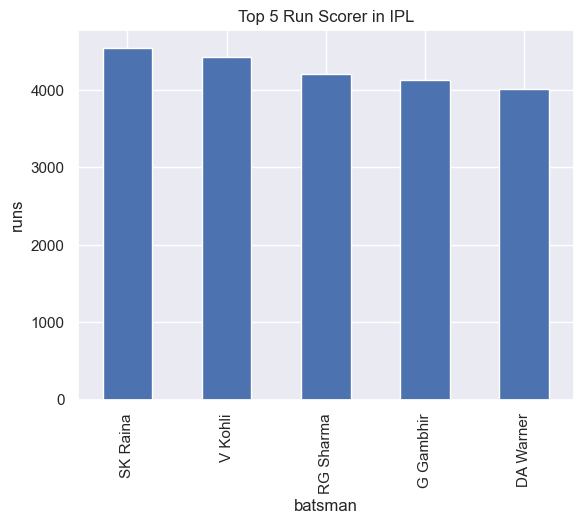

In [62]:
# Analysing Batsman and runs

deliveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:5].plot.bar()
plt.ylabel('runs')
plt.title('Top 5 Run Scorer in IPL')

**Inference:**
* Top 5 run scorer in IPL:
    - SK Raina   -     4548 runs
    - V Kohli    -     4423 runs
    - RG Sharma   -    4207 runs
    - G Gambhir   -    4132 runs
    - DA Warner   -    4014 runs
    

In [63]:
# finding batsman with Most fours 
temp = deliveries_df[deliveries_df['batsman_runs']==4]
temp.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)[:5]

batsman
G Gambhir    484
SK Raina     402
DA Warner    401
S Dhawan     401
V Kohli      384
Name: batsman_runs, dtype: int64

Text(0.5, 1.0, 'Most Fours(top 5)')

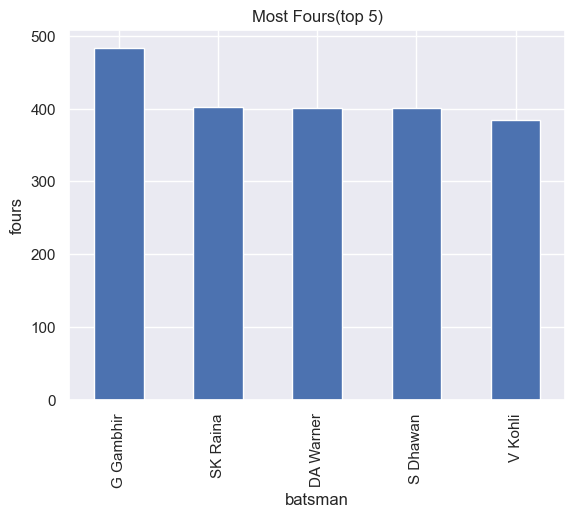

In [64]:
temp.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)[:5].plot.bar()
plt.ylabel('fours')
plt.title('Most Fours(top 5)')

**Inference:**
* Most Fours
    *  G Gambhir       -  484 fours
    * SK Raina        -  402 fours
    * DA Warner       -  401 fours
    * S Dhawan       -   401 fours
    * V Kohli        -   384 fours

In [65]:
# finding batsman with most sixes
temp = deliveries_df[deliveries_df['batsman_runs']==6]
temp.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)[:5]

batsman
CH Gayle     266
SK Raina     174
RG Sharma    173
V Kohli      160
DA Warner    160
Name: batsman_runs, dtype: int64

Text(0.5, 1.0, 'Most Sixes(top 5)')

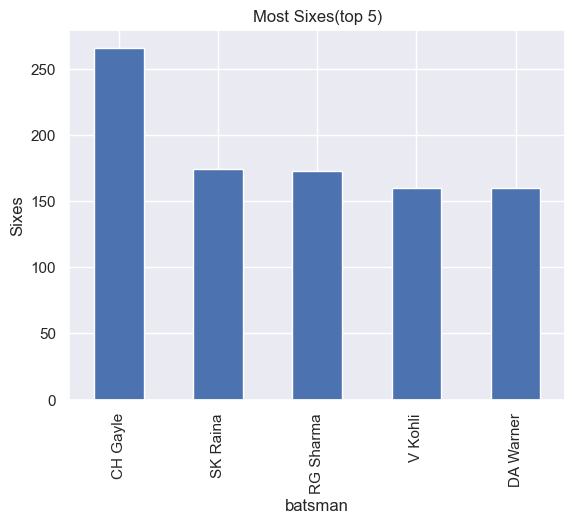

In [66]:
temp.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)[:5].plot.bar()
plt.ylabel('Sixes')
plt.title('Most Sixes(top 5)')


**Inference**
* Most Sixes
    * CH Gayle   -   266 Sixes
    * SK Raina    -  174 Sixes
    * RG Sharma   -  173 Sixes
    * V Kohli    -   160 Sixes
    * DA Warner  -   160 Sixes

In [67]:
# finding batsman who scored >=50 runs most number of times.
temp = deliveries_df.groupby(['match_id','batsman'])['batsman_runs'].sum()
temp = temp[temp>=50]
temp

match_id  batsman     
1         MC Henriques    52
          Yuvraj Singh    62
2         AM Rahane       60
          SPD Smith       84
3         CA Lynn         93
                          ..
635       AJ Finch        50
          DA Warner       93
636       CH Gayle        76
          DA Warner       69
          V Kohli         54
Name: batsman_runs, Length: 957, dtype: int64

In [68]:
temp = temp.reset_index(level=1)
temp

,batsman,batsman_runs
match_id,,
1,MC Henriques,52
1,Yuvraj Singh,62
2,AM Rahane,60
2,SPD Smith,84
3,CA Lynn,93
...,...,...
635,AJ Finch,50
635,DA Warner,93
636,CH Gayle,76


In [69]:
temp['batsman'].value_counts()[:5]

DA Warner    39
G Gambhir    35
V Kohli      35
RG Sharma    33
SK Raina     32
Name: batsman, dtype: int64

Text(0, 0.5, '50s')

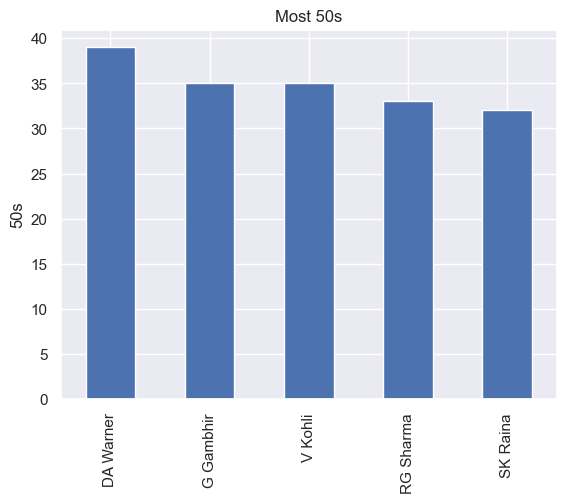

In [70]:
temp['batsman'].value_counts()[:5].plot.bar()
plt.title('Most 50s')
plt.ylabel('50s')

** Inference**:
* Top 5 batmans who has scored  >=50  runs  in a match most number of times.
    * DA Warner   - 39
    * V Kohli     - 34
    * G Gambhir   - 33
    * SK Raina    - 31
    * RG Sharma   - 28

In [71]:
# finding batsmans who has scored >=100 runs most number of times.
temp = deliveries_df.groupby(['match_id','batsman'])['batsman_runs'].sum()
temp = temp[temp>=100]
temp

match_id  batsman         
9         SV Samson           102
22        HM Amla             104
36        DA Warner           126
38        BA Stokes           103
46        HM Amla             104
60        BB McCullum         158
61        MEK Hussey          116
68        A Symonds           117
72        AC Gilchrist        109
96        ST Jayasuriya       114
97        SE Marsh            115
125       AB de Villiers      105
171       MK Pandey           114
176       YK Pathan           100
200       DA Warner           107
206       M Vijay             127
208       DPMD Jayawardene    110
243       PC Valthaty         120
247       SR Tendulkar        100
258       CH Gayle            102
279       V Sehwag            119
280       CH Gayle            107
296       AC Gilchrist        106
323       KP Pietersen        103
326       AM Rahane           103
331       DA Warner           109
363       RG Sharma           109
372       CH Gayle            128
380       M Vijay    

In [72]:
temp = temp.reset_index(level=1)
temp

,batsman,batsman_runs
match_id,,
9,SV Samson,102
22,HM Amla,104
36,DA Warner,126
38,BA Stokes,103
46,HM Amla,104
60,BB McCullum,158
61,MEK Hussey,116
68,A Symonds,117
72,AC Gilchrist,109


In [ ]:
temp['batsman'].value_counts()[:5]

Text(0, 0.5, '100s')

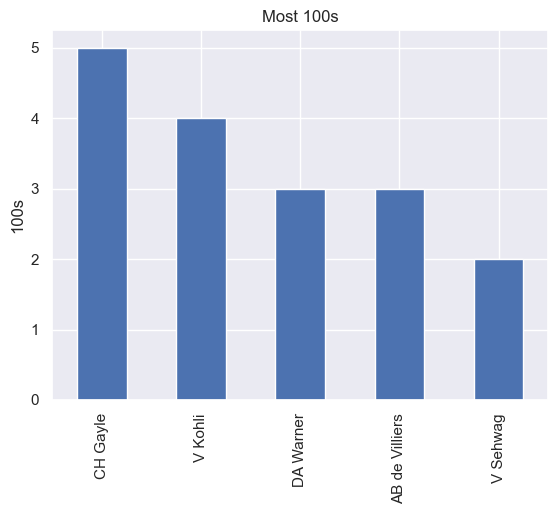

In [73]:
temp['batsman'].value_counts()[:5].plot.bar()
plt.title('Most 100s')
plt.ylabel('100s')

**Inference**:
* Top 5 batsman who scored>=100 runs in a match, most number of times.
    * CH Gayle          5 
    * V Kohli           4
    * DA Warner         3
    * AB de Villiers    3
    * V Sehwag          2

In [ ]:
deliveries_df.head()

In [74]:
deliveries_df.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [75]:
# Analysing Bowlers and wickets
temp = deliveries_df[(deliveries_df['dismissal_kind']!='run out') 
                     & (deliveries_df['dismissal_kind']!='retired hurt') 
                     & (deliveries_df['dismissal_kind']!='obstructing the field')
                    ]
#temp.dropna()
temp = temp[temp['dismissal_kind'].isnull() ==False]
temp

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150402,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,11,3,CH Gayle,V Kohli,BCJ Cutting,0,...,0,0,0,0,0,0,0,CH Gayle,caught,Bipul Sharma
150416,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,5,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
150422,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,5,AB de Villiers,KL Rahul,Bipul Sharma,0,...,0,0,0,0,0,0,0,AB de Villiers,caught,MC Henriques
150432,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,16,3,KL Rahul,SR Watson,BCJ Cutting,0,...,0,0,0,0,0,0,0,KL Rahul,bowled,NaN


In [76]:
temp['bowler'].value_counts()[:5]

SL Malinga         154
A Mishra           134
Harbhajan Singh    127
PP Chawla          126
DJ Bravo           122
Name: bowler, dtype: int64

<AxesSubplot: >

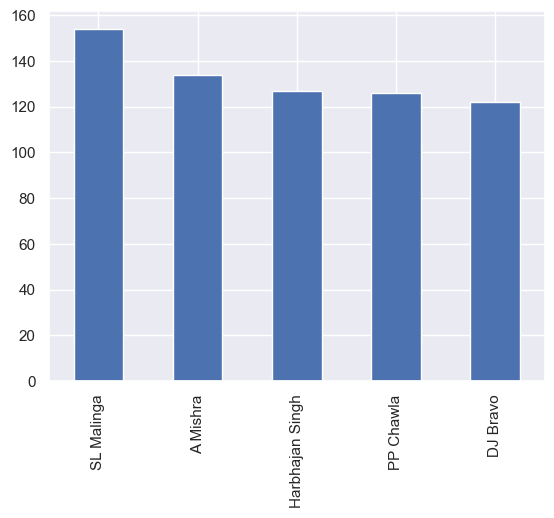

In [77]:
temp['bowler'].value_counts()[:5].plot.bar()

**Inference**:
* Top 5 wicket taker bowlers:
    - SL Malinga      -   154 Wickets
    - A Mishra         -  134 Wickets
    - Harbhajan Singh  -  127 Wickets
    - PP Chawla        -  126 Wickets
    - DJ Bravo         -  122 Wickets

**Economy of a bowler:** In cricket, a bowler's economy rate is the average number of runs they have conceded per over bowled. In most circumstances, the lower the economy rate is, the better the bowler is performing

In [78]:
# find economy of bowler
temp = deliveries_df.groupby(['match_id','over','bowler'])['total_runs'].sum()
temp = temp.reset_index(level=[1,2])
temp

,over,bowler,total_runs
match_id,,,
1,1,A Nehra,11
1,1,TS Mills,7
1,2,A Choudhary,16
1,2,B Kumar,1
1,3,A Nehra,16
...,...,...,...
636,18,SR Watson,12
636,19,CJ Jordan,16
636,19,Mustafizur Rahman,12


In [79]:
bowler_runs = temp.groupby('bowler')['total_runs'].sum()

In [80]:
bowler_overs = temp.groupby(['bowler'])['over'].count()
bowler_overs

bowler
A Ashish Reddy     45
A Chandila         39
A Choudhary        17
A Flintoff         11
A Kumble          163
                 ... 
YA Abdulla         35
YK Pathan         190
YS Chahal         201
Yuvraj Singh      144
Z Khan            371
Name: over, Length: 356, dtype: int64

In [81]:
economy = bowler_runs/bowler_overs
economy.sort_values()

bowler
AC Gilchrist     0.0
N Rana           3.0
Sachin Baby      4.0
NB Singh         4.5
AM Rahane        5.0
                ... 
P Prasanth      18.0
V Shankar       19.0
B Chipli        20.0
LPC Silva       21.0
I Malhotra      23.0
Length: 356, dtype: float64